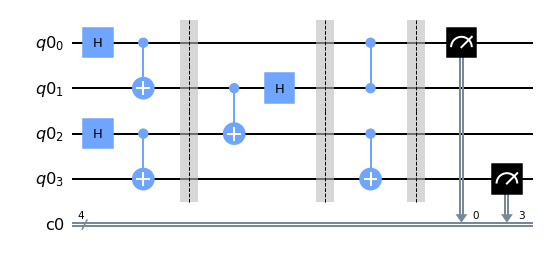

In [1]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

def make_entanglement(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

def make_communicate(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

make_entanglement(qc, 0, 1)
make_entanglement(qc, 2, 3)
qc.barrier()

make_communicate(qc, 1, 2)

qc.barrier()
qc.cx(2, 3)
qc.cz(1, 0)

qc.barrier()
qc.measure(0,0)
qc.measure(3,3)

%matplotlib inline
qc.draw(output='mpl')

In [2]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("oA1RA2hIZo6QtKQ3kw43BeGFf4GMfiGA")


In [3]:
simulator_backend = provider.get_backend("ionq_simulator")
job = simulator_backend.run(qc, shots=1024)
print(job.get_counts())

{'0000': 512, '1001': 512}


In [4]:
qpu_backend = provider.get_backend("ionq_qpu")

In [5]:
qpu_job = qpu_backend.run(qc, shots=1024)

In [6]:
from qiskit.providers.jobstatus import JobStatus
import time
while qpu_job.status() is not JobStatus.DONE:
    print("Job Status is ", qpu_job.status) 
    time.sleep(60)

print("FInally", qpu_job.status() )
print(qpu_job.get_counts())

Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63EBF70>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63EBF70>>
FInally JobStatus.DONE
<bound method IonQJob.get_counts of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63EBF70>>


In [7]:
print(qpu_job.get_counts())

{'0000': 451, '0001': 39, '1000': 55, '1001': 479}


In [8]:
qpu_job = qpu_backend.run(qc, shots=10240)
from qiskit.providers.jobstatus import JobStatus
import time
while qpu_job.status() is not JobStatus.DONE:
    print("Job Status is ", qpu_job.status) 
    time.sleep(60)

print("FInally", qpu_job.status() )
print(qpu_job.get_counts())

Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63FC9A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63FC9A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63FC9A0>>
Job Status is  <bound method IonQJob.status of <qiskit_ionq.ionq_job.IonQJob object at 0x000001CBB63FC9A0>>
FInally JobStatus.DONE
{'0000': 4555, '0001': 489, '1000': 501, '1001': 4695}


In [9]:
print(qpu_job.get_probabilities())

{'0000': 0.44482773437500006, '0001': 0.047748046875, '1000': 0.0489234375, '1001': 0.45850078125000004}


In [11]:
counts = qpu_job.get_counts(qc)
print(f"The experimental error rate : {(1 - (counts['0000'] + counts['1001'])/sum(counts.values())) * 100 :.3f}%")

The experimental error rate : 9.668%
